![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz


In [134]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [176]:
# Celda 1.1
bikes.groupby('season').total.mean()
promedio_season=bikes.groupby('season').total.mean()
std_season=bikes.groupby('season').total.std()
min_season=bikes.groupby('season').total.min()
max_season=bikes.groupby('season').total.max()

#
print("promedio_estacion:",promedio_season)
print("std_estacion:",std_season)
print("min_estacion:",min_season)
print("max_estacion:",max_season)


promedio_estacion: season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64
std_estacion: season
1    125.273974
2    192.007843
3    197.151001
4    177.622409
Name: total, dtype: float64
min_estacion: season
1    1
2    1
3    1
4    1
Name: total, dtype: int64
max_estacion: season
1    801
2    873
3    977
4    948
Name: total, dtype: int64


<bound method NDFrame.describe of datetime
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
2011-01-01 04:00:00    1
                      ..
2012-12-19 19:00:00    4
2012-12-19 20:00:00    4
2012-12-19 21:00:00    4
2012-12-19 22:00:00    4
2012-12-19 23:00:00    4
Name: season, Length: 10886, dtype: int64>

Al agruparse la informacion pòr season-estacion se observa que el menor numero de participantes promedio es en la season 1 con 116 y el mayor numero esta en la season 3 con 234, esto se expolica porque la season 1 es invierno en un lugar frio y el mayor uso es en la season 3 en verano. Pues el uso de bicicleta en invierno puede llegar ser incomodo e inseguro mientras que en verano es mucho mejor. el minimo para todas las estaciones es 1 y el maximo es de 977 participantes en verano. 

In [136]:
# Celda 1.2
bikes.groupby('hour').total.mean()
std_hora=bikes.groupby('hour').total.std()
min_hora=bikes.groupby('hour').total.min()
max_hora=bikes.groupby('hour').total.max()

#
print("promedio_hora:",promedio_hora)
print("std_hora:",std_hora)
print("min_hora:",min_hora)
print("max_hora:",max_hora)


promedio_hora: hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64
std_hora: hour
0      43.620012
1      34.112105
2      26.110267
3      12.666442
4       4.217633
5      12.784293
6      54.745333
7     159.207044
8     231.723065
9      92.099209
10    101.807629
11    127.444294
12    143.881880
13    149.167185
14    147.563199
15    144.235670
16    145.664786
17    223.775485
18    219.908138
19    156.641732
20    116.411565
21     87.629319
22     69.844495
23     51.638004
Name: total, dtype: float64
min_hora: hour
0      2
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8     

AL observar el promedio por horas se ve claramente como en horas de la noche los participantes disminuyen llegando a un minimo a las 4 de la mañana con 6 participantes lo cual es entendible. El maximo se observa alas 5 de la tarde con 468 paticipantes pues es la hora en que las personas 1- salen del trabajo o 2- quieren salir a recorrer la ciudad en bicicleta. Al observar el reporte de minimos se observa de nuevo la tendencia de menor uso es horas de la madrugada y tres sectores o picos uno de 9 a 11 otro de 13 a 14 horaqs y el toro de 16 a 20 horas, lo cual es entendicle en una ciudad en donde s epude monter en bicicleta de manera segura. Pues estos peridos corresponden a desplazamientos de inicio de trabajo, almuerzo y final del horario laboral. Al observar los maximos se ve que las horas de menor uso corresponden a las horas de la mañana principlamente de 3 a 5 de la mañana, algo eprfectamente logico para este tipo de uso.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

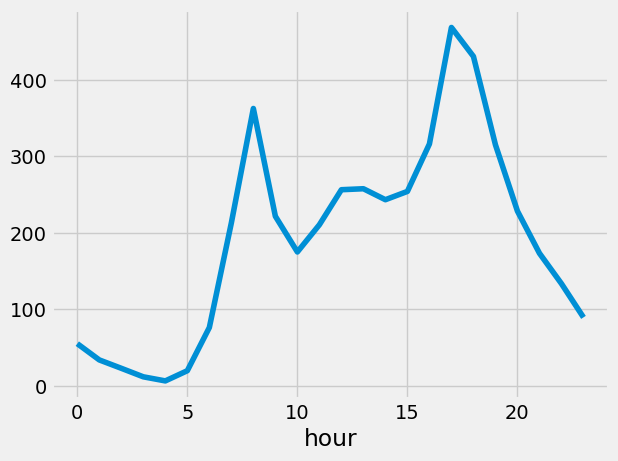

In [137]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

Se observan tres picos altos, los picos alñtos son descritos mas adelante. y un pico bajo en horas de la madrugada, algo perfectamente entendible pues el poco uso de bicicleta despues de medianoche.

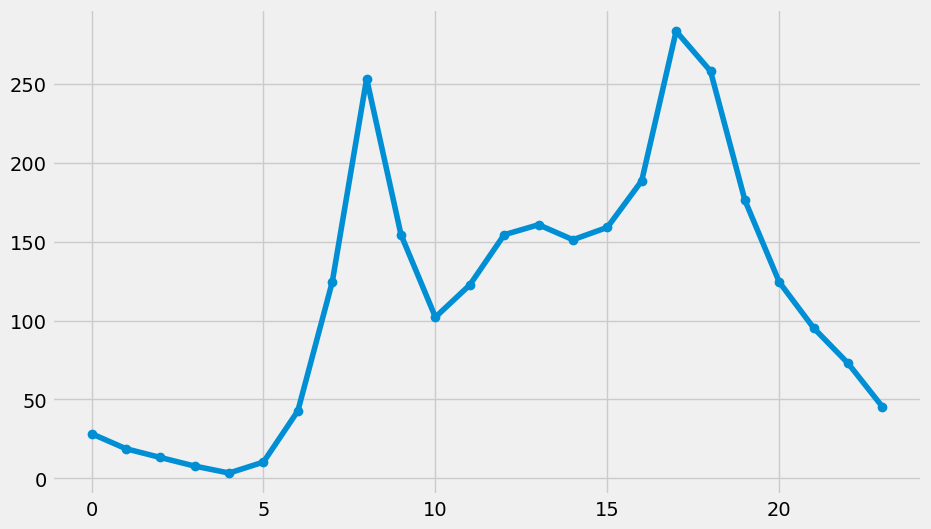

In [138]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt
winter_hora_promedio=bikes[bikes["season"]==1].groupby('hour')['total'].mean()
plt.figure(figsize=(10, 6))
plt.plot(winter_hora_promedio.index, winter_hora_promedio.values, label='Invierno', marker='o')

Al graficar el numero de biciclentas rentadas vs la hora se observa que hay tres picos altoscorrespondientes a als horas de 9-10 am, de 12 a 13 y a partir de las 15 horas, esto como ya se habia emncionado se debe tal vez a la coincidencia de horario de entrar a trabajr, horario de almuerso y horario de salida de oficina. Uno podria inferir que el alto uso de biocicletas indica una ciudad relativamente segura para los usuarios y distancias de la casa al trabajo relativamente cercanas que les permiten montar en bicileta para llegar o salir al trabajo y salir a almorzar.

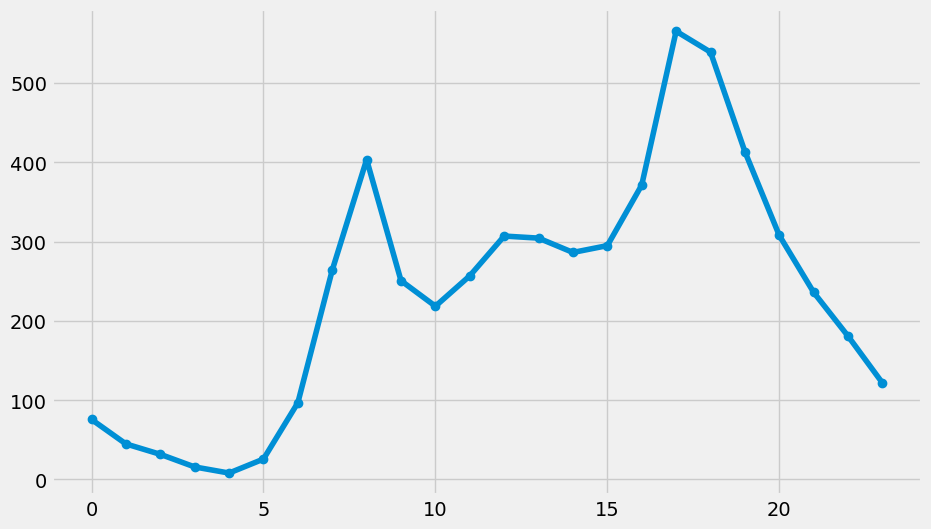

In [139]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
summer_hora_promedio=bikes[bikes["season"]==3].groupby('hour')['total'].mean()
plt.figure(figsize=(10, 6))
plt.plot(summer_hora_promedio.index, summer_hora_promedio.values, label='Verano', marker='o')

Cuando se compara esta grafica con el horario de invierno se ve que tienen la misma forma por als razones ya explicadas sin embargo el numero total cambia de invierno en la primera grafica a veraqno lo cual se explica facilmente por la severidad del invierno y la disminucion de usario en un clima mas frio.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [143]:
# Celda 3
bikes['season_factorize'] = pd.factorize(bikes.season)[0]

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [145]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X = bikes[['season_factorize', 'hour']]  # Características
y = bikes['total']  # Variable objetivo

# Dividir los datos en un 70% para entrenamiento y un 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Modleo de Regrtsion Lineal
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)
# Coeficientes del modelo
print("Coeficientes del modelo:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Error cuadrático medio (MSE): 27062.110395300824
Coeficientes del modelo:
Intercepto: 25.917459052760393
Coeficientes: [27.961809   10.72252011]


Se observa un MSE muy alto lo que indica que las variables hour y season no describen muy bien la variable total. El intercepto es 25 lo que esta un poco alejado del valor minimo de 1 obtenido en los apsos anteriores, algo esperado por el valor tan alto de MSE.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

<Axes: xlabel='hour', ylabel='total'>

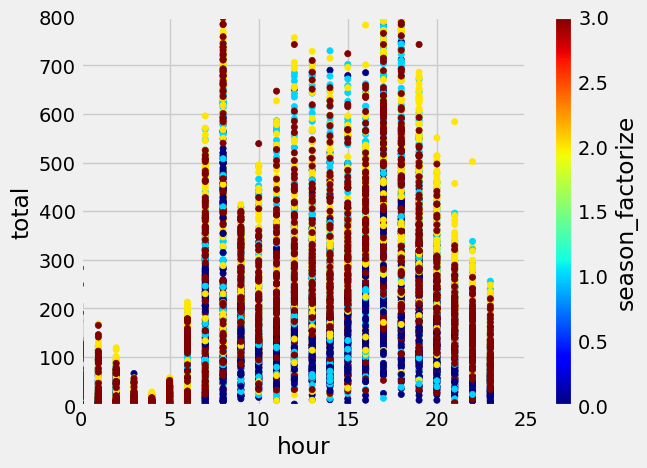

In [183]:
# Celda 4
# Gráfica 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
bikes.plot(kind='scatter', x='hour', y='total', c='season_factorize', colormap='jet', xlim=(0, 25), ylim=(0, 800))


In [184]:
# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 10
max_features = None
min_gain=0.001
# Impresión variable a usar (Hits)
j = 1
print(X.columns[j])


n_tokens_title


In [185]:
# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 3.,  8.,  9., 10., 11., 12., 13.])

In [186]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [187]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [188]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

0.49993722979387833

In [189]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

0.4996087828255661

In [190]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [191]:
# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

0.00015670603905898473

In [192]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [193]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(26, 3120.62347544, 0.035912000000000055)

In [194]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [195]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(6000, 3000, 3000)

In [196]:
y.mean(), y_l.mean(), y_r.mean()

(0.5, 0.366, 0.634)

In [197]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [198]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)

{'y_pred': 1,
 'y_prob': 0.5,
 'level': 0,
 'split': [26, 2980.6923531436364],
 'n_samples': 6000,
 'gain': 0.0348732856787054,
 'sl': {'y_pred': 0,
  'y_prob': 0.35544155368266767,
  'level': 1,
  'split': [21, 920.0909090909092],
  'n_samples': 2727,
  'gain': 0.008693191616418905,
  'sl': {'y_pred': 0,
   'y_prob': 0.4052964881980426,
   'level': 2,
   'split': [25, 3572.437025628182],
   'n_samples': 1735,
   'gain': 0.010920047130314081,
   'sl': {'y_pred': 0,
    'y_prob': 0.3080568720379147,
    'level': 3,
    'split': [22, 690400.0],
    'n_samples': 631,
    'gain': 0.01313875257134478,
    'sl': {'y_pred': 0,
     'y_prob': 0.4225352112676056,
     'level': 4,
     'split': [42, 0.028834432136454546],
     'n_samples': 211,
     'gain': 0.021794409040981455,
     'sl': {'y_pred': 1,
      'y_prob': 0.6341463414634146,
      'level': 5,
      'split': [55, 0.9772727272727273],
      'n_samples': 39,
      'gain': 0.09392317084624768,
      'sl': {'y_pred': 1,
       'y_prob':

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

DecisionTreeClassifier(max_depth=4, random_state=1)

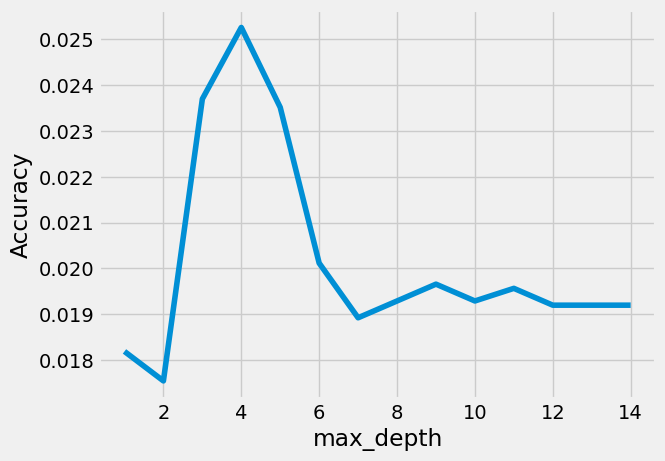

In [165]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 15)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X, y)

In [166]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
feature_cols = X.columns
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
0,season_factorize,0.206973
1,hour,0.793027


Se observa claramente que la variable hora tiene mucho mayor impacto en la variable total, algo que se esperaba desde que hicimos las graficas. Tambien al graficar accuracy vs max-depth el valor optimo es 4 pues es el valor mas alto de accuracy.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [200]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [201]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [202]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [105]:
# Celda 6


In [253]:
df.describe

<bound method NDFrame.describe of                                                     url  timedelta  \
0     http://mashable.com/2014/12/10/cia-torture-rep...       28.0   
1     http://mashable.com/2013/10/18/bitlock-kicksta...      447.0   
2     http://mashable.com/2013/07/24/google-glass-po...      533.0   
3     http://mashable.com/2013/11/21/these-are-the-m...      413.0   
4     http://mashable.com/2014/02/11/parking-ticket-...      331.0   
...                                                 ...        ...   
5995  http://mashable.com/2013/08/03/twerking-addict...      523.0   
5996  http://mashable.com/2014/08/21/study-programs-...      139.0   
5997  http://mashable.com/2013/04/25/email-warrant-m...      623.0   
5998  http://mashable.com/2013/06/03/smartphone-sale...      584.0   
5999         http://mashable.com/2013/09/06/twerk-fire/      489.0   

      n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                9.0             188.0         0

In [254]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

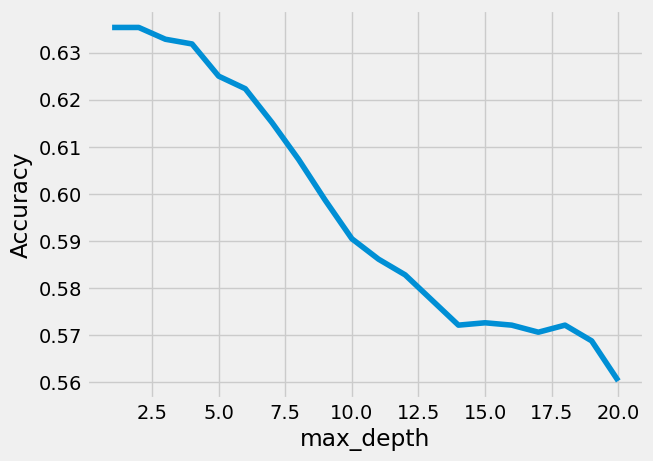

In [255]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [256]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6353333333333333, 2)

In [257]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [258]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
print(X.columns)
feature_cols=X.columns
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

,feature,importance
0,timedelta,0.000000
31,weekday_is_tuesday,0.000000
32,weekday_is_wednesday,0.000000
33,weekday_is_thursday,0.000000
34,weekday_is_friday,0.000000
35,weekday_is_saturday,0.000000
36,weekday_is_sunday,0.000000
37,is_weekend,0.000000
38,LDA_00,0.000000
39,LDA_01,0.000000


In [259]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.635333
std       0.018186
min       0.610000
25%       0.624167
50%       0.631667
75%       0.645000
max       0.668333
dtype: float64

In [261]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print("accuracy:",accuracy,"f1_score:",f1)

accuracy: 0.6125 f1_score: 0.6141078838174274


Regrsion logistica

In [262]:
model = LogisticRegression()
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print("accuracy:",accuracy,"f1_score:",f1)

accuracy: 0.6125 f1_score: 0.6141078838174274


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [263]:
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [264]:
# Entrenamiento de 100 modelos con las 100 muestras boostrap

from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [265]:
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1113,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
3639,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,1,0,1,1
3383,1,1,1,0,1,0,0,0,1,1,...,1,0,1,0,1,1,1,0,1,1
836,1,1,1,1,1,1,0,0,1,1,...,1,1,1,0,1,1,1,0,1,1
3262,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1


In [266]:
# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

1113    90
3639    84
3383    61
836     70
3262    82
4400    25
4994    80
2464    56
5935    50
4741    16
dtype: object

In [269]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6408094435075886, 0.645)

100 arboles usando min_samples_leaf

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [233]:
param_grid = {'min_samples_leaf': [1, 2, 5, 10, 20,30,40,50,60,100,200,300,350,400,450,500,600,700,800,900,1000,2000]}
tree_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Mejor valor para min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])
print("Puntaje F1 correspondiente al mejor valor:", grid_search.best_score_)

Mejor valor para min_samples_leaf: 400
Puntaje F1 correspondiente al mejor valor: 0.6318452718315815


100 regresiones logisticas

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [238]:
models = []
accuracies = []
f1_scores = []
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
    model = LogisticRegression()
    model.fit(X_train, y_train)  
    models.append(model)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) 
    accuracies.append(accuracy)
    f1_scores.append(f1)

In [279]:
import statistics
np.mean(f1_scores)

0.6090653436356872

In [239]:
f1_scores

[0.6277128547579299,
 0.6249999999999999,
 0.6110638297872341,
 0.617056856187291,
 0.5872340425531913,
 0.5986509274873524,
 0.6582491582491583,
 0.6142259414225942,
 0.6225165562913907,
 0.5986159169550171,
 0.6030150753768844,
 0.6270627062706271,
 0.5940594059405941,
 0.6159110350727117,
 0.6117647058823529,
 0.6188870151770657,
 0.6357504215851603,
 0.6212489862124897,
 0.62248322147651,
 0.5853242320819112,
 0.6209744013212222,
 0.6037414965986394,
 0.6220735785953178,
 0.5914069081718618,
 0.6040609137055837,
 0.6083262531860663,
 0.6017543859649123,
 0.6095717884130983,
 0.5932932072227,
 0.5924006908462868,
 0.606312292358804,
 0.5938037865748709,
 0.626916524701874,
 0.6033898305084746,
 0.6282973621103118,
 0.622112211221122,
 0.6444073455759598,
 0.6196943972835314,
 0.5784982935153584,
 0.6068734283319365,
 0.6100254885301614,
 0.5694799658994032,
 0.6108714408973253,
 0.607232968881413,
 0.5850694444444445,
 0.5903614457831327,
 0.6149957877000842,
 0.6210873146622734,
 0

In [240]:
accuracies

[0.6283333333333333,
 0.625,
 0.6191666666666666,
 0.6183333333333333,
 0.5958333333333333,
 0.6033333333333334,
 0.6616666666666666,
 0.6158333333333333,
 0.62,
 0.6133333333333333,
 0.605,
 0.6233333333333333,
 0.59,
 0.6258333333333334,
 0.615,
 0.6233333333333333,
 0.64,
 0.6108333333333333,
 0.625,
 0.595,
 0.6175,
 0.6116666666666667,
 0.6233333333333333,
 0.5958333333333333,
 0.61,
 0.6158333333333333,
 0.6216666666666667,
 0.6125,
 0.6058333333333333,
 0.6066666666666667,
 0.605,
 0.6066666666666667,
 0.635,
 0.61,
 0.6125,
 0.6183333333333333,
 0.645,
 0.6266666666666667,
 0.5883333333333334,
 0.6091666666666666,
 0.6175,
 0.5791666666666667,
 0.6241666666666666,
 0.6108333333333333,
 0.6016666666666667,
 0.6033333333333334,
 0.6191666666666666,
 0.6166666666666667,
 0.5983333333333334,
 0.6425,
 0.6166666666666667,
 0.61,
 0.6233333333333333,
 0.64,
 0.625,
 0.6183333333333333,
 0.6141666666666666,
 0.6016666666666667,
 0.6075,
 0.5933333333333334,
 0.635,
 0.62,
 0.5875,
 0.

In [280]:
np.mean(accuracies)

0.6142333333333334

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [270]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [271]:
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

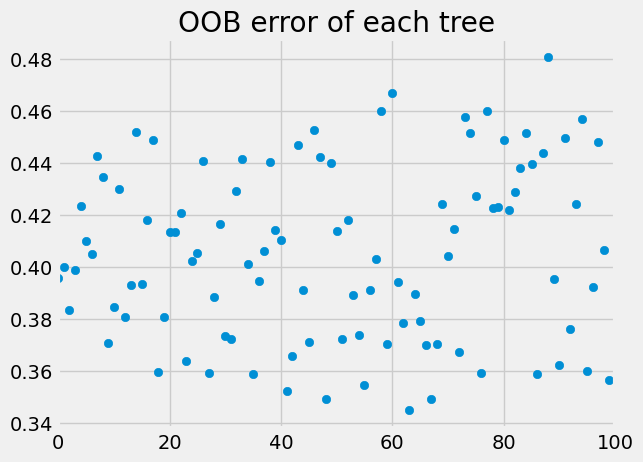

In [272]:
# Visualización de OOB para cada árbol
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [273]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [274]:
# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)


1113    0.906505
3639    0.847585
3383    0.624618
836     0.712686
3262    0.829278
4400    0.240762
4994    0.810411
2464    0.578029
5935    0.508218
4741    0.153942
4060    0.758167
4434     0.27239
5920    0.283894
856     0.047103
3665    0.303354
2471    0.242941
2396    0.160387
5695    0.183066
2431     0.70338
174      0.27374
dtype: object

In [276]:
# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6418918918918919, 0.6466666666666666)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9
Los valores de f1 y accuracy obtenidos en la pregunta 7 con votacion mayoritaria
-100 árboles de decisión donde max_depth tome un valor de su elección f1 0.6408094435075886,accuracy 0.645
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección f1 0.6318452718315815, accuracy
-100 regresiones logísticas f1 0.6090653436356872 , accuracy 0.6142333333333334 
Los valores de f1 y accuracy obtenidos en la pregunta 8 con votacion ponderada
-100 árboles de decisión donde max_depth tome un valor de su elección f1 0.6418918918918919,accuracy 0.6466666666666666

Conclusiones:
-No entendi como variar las variables min_samples_leaf ni cmo hacer diferente regresion logistica.
- De los resultados se puede concluir que el valor de f1 mas alto esta en las regresion logistica mientras que la accuracy mas alta esta en la votacion ponderada.
